In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, FancyBboxPatch
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib

### Load data.

In [8]:
previous, current = os.path.split(os.getcwd())
dname = previous[0:-5]

# import words features values distributions
sub = pd.read_csv(dname + "\\data\\GLMM\\all_subjects_isolated_words_peak_env.csv")
subsub = sub.loc[(sub['suj_id']== 1 ) & (sub['real_speed']== 1.0)]
subsub = subsub[['nb_phon_s','nb_syll_s','phon_fl_s', 'syll_fl_s','log(freqlex)_s','peak_env']]

# import words isolation point distributions
words_ip = pd.read_csv(dname +"\\data\\LMM\\features_values_distributions_words_ip_pk_env.csv")
words_ip = words_ip[["phonemic_rate","syllabic_rate","phonemic_info","syllabic_info","static_surp","peak_env"]]
words_ip.columns = ['nb_phon_s','nb_syll_s','phon_fl_s', 'syll_fl_s','log(freqlex)_s','peak_env']

In [12]:
words = pd.read_csv(dname + "\\data\\LMM\\overlap_words_pk_env.csv")
words2 = words[["phonemic_rate","syllabic_rate", "syllabic_info","static_surp", "peak_env"]]
words2.columns = ['nb_phon_s','nb_syll_s', 'syll_fl_s','log(freqlex)_s','peak_env']
words2['data'] = np.repeat('words', 21)

C:\Users\Jeremy\AppData\Local\Temp/ipykernel_13652/3454002898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words2['data'] = np.repeat('words', 21)


In [13]:
words2 = words2[['peak_env','nb_phon_s','nb_syll_s','log(freqlex)_s','data']]

In [14]:
variables = [ "peak_env",'nb_phon_s','','nb_syll_s','log(freqlex)_s','']
colors = ['k','#e41a1c','#efca08', '#ff7f00','#377eb8','']
colors2 = ['k','#e41a1c','#ff7f00','#377eb8']

tiks = [       np.linspace(0,40, num=5, dtype=np.int32),
        np.linspace(0,120, num=5, dtype=np.int32),
np.linspace(0,2500, num=5, dtype=np.int32),

np.linspace(0,40, num=5, dtype=np.int32),
np.linspace(0,250, num=5, dtype=np.int32),
        np.linspace(0,1, num=5, dtype=np.int32),
]

xlabels = [ 'Rate ($s^{-1}$)',
    'Rate ($s^{-1}$)',  
    '',
   
    'Rate ($s^{-1}$)',
    'Surprise rate ($bit.s^{-1}$)',
            '',
   ]

#lims = [[7,61],[3.5,27],[50,900],[50,2000],[5,45]]
lims = [[0,52],[0,120],[0,2500],[0,42],[0,250],[]]

titles =[     r'Acoustic modulation rate',
            r'Phonemic rate',    
            r'',
            r'Syllabic rate',
            r'Static lexical surprise',
            r''
          ]

dfs=[subsub, words_ip]#all_words_lexique] #words_ip]
legend_elements = [  
                Patch(facecolor='#377eb8',alpha= 0.35 ,edgecolor='darkblue',label='non compressed'),
                Patch(facecolor='grey', edgecolor='darkgrey',alpha= 0.5 ,label='compressed (x2 -> x10)'),
                Patch(facecolor='#377eb8',edgecolor='#377eb8',label='channel capacity')]                       

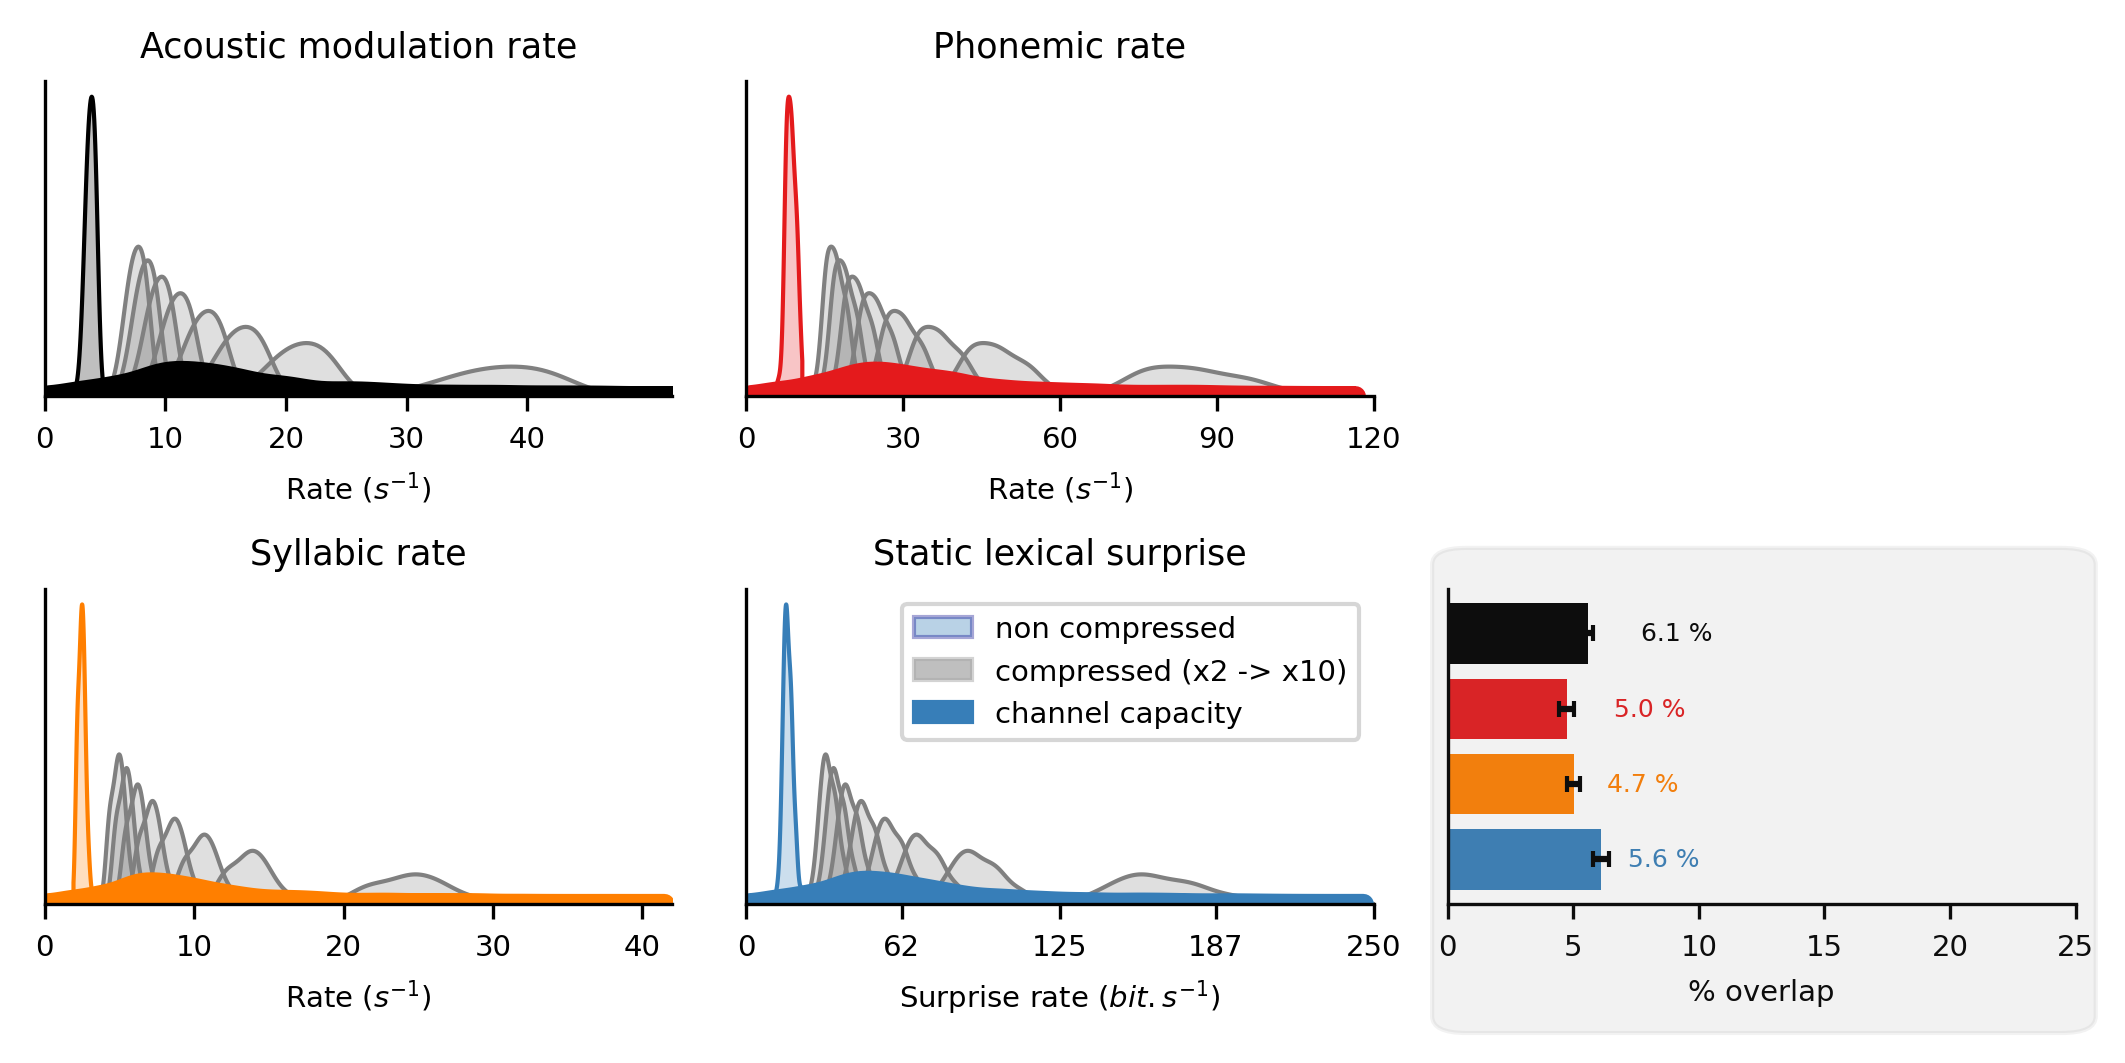

In [15]:
fig, axs = plt.subplots(2,3,figsize=(7.09,3.5), facecolor='w',dpi = 300)
plt.rcParams["font.size"] = "7"


for i,(variable,ax,col,lim,tit,xlab,tik) in enumerate(zip(variables,axs.ravel(),colors,lims,titles,xlabels,tiks)):
    if i == 2: continue
    if i == 5:
        axis1 = axs.ravel()[5]
        x_pos =np.arange(len(variables)-2)[::-1]
        CTEs = [np.mean(words2[i].values) for i in words2.columns[0:-1]]
        error = [np.std(words2[i].values) for i in words2.columns[0:-1]] /np.sqrt(np.size(words2[0:-1],0))
        axis1.barh(x_pos, CTEs,
               xerr=error,
               align='center',
               ecolor='black',
                color=colors2,
               capsize=2)
        axis1.spines['right'].set_visible(False)
        axis1.set_xlim(0,25)
        axis1.spines['top'].set_visible(False)
        axis1.set_yticks([])
        axis1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        axis1.set_xlabel("% overlap")
        for i, v in enumerate(CTEs):
                axis1.text(v+1.6, i, str(round(v, 1))+" %", color=colors2[::-1][i], va="center", fontsize=6)

    else:
        a = 0
        for df in dfs:
            a+=1
            if a==1:
                sns.kdeplot(df[variable].values, fill=True, ax=ax,
                         color=col, cut = 0, log_scale = False, label ='selected')
                for j in [2,2.2,2.5,2.9,3.5,4.3,5.6,10.]:
                    sns.kdeplot((df[variable].values)*j, fill=True, ax=ax,
                         color='grey', cut = 0)
            else:
                sns.kdeplot(df[variable].values, fill=True,ax=ax,
                          color=col, cut = 0, alpha =1,log_scale = False, linewidth = 5, label ='mono')

        ax.spines['right'].set_visible(False)
        ax.set_xlim(lim)
        ax.spines['top'].set_visible(False)
        ax.set_yticks([])
        ax.set_title(tit)
        ax.set_xticks(tik)

        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_xlabel(xlab)
        ax.set_ylabel('')
    
axs.ravel()[4].legend(handles=legend_elements,loc='upper right')

axs.ravel()[2].set_axis_off()


# add grey fancy box 
fig.patches.extend([FancyBboxPatch((0.69,0.03),0.28,0.43,
                                   fill=True, color='grey', alpha=.1, 
                                boxstyle="round,pad=0.08", transform=fig.transFigure, mutation_scale=.20, mutation_aspect=None)])

plt.tight_layout()

In [28]:
#fig.savefig(dname + '\\Figures\\Figure_Supp_7.png', dpi=300,bbox_inches='tight')